In [1]:
%matplotlib inline
import os
os.chdir('/media/DATA/Pro/Projects/Paris/Orientation/Niccolo/Paris_orientation-decoding')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from mne.decoding import GeneralizationAcrossTime
from base import load_epochs_events, resample_epochs, decim
from config import paths, subjects, preproc, analyses
from jr.gat import scorer_auc
# Select target presence analysis: strongest SNR
analysis = [ii for ii in analyses if ii['name'] == 'target_present'][0]

In [3]:
def load_data(subject):
    # load data
    epochs, events = load_epochs_events(subject, paths)
    
    # remove meaningless trials
    query, condition = analysis['query'], analysis['condition']
    sel = range(len(events)) if query is None else events.query(query).index
    sel = [ii for ii in sel if ~np.isnan(events[condition][sel][ii])]
    
    # set regressor
    y = np.array(events[condition], dtype=np.float32)
    
    return epochs, y

In [7]:
def decod_freqs(subject):
    from mne.time_frequency import cwt_morlet
    from mne import create_info, EpochsArray
    scores = list()
    freqs = np.arange(5., 20., 1.)

    for ii, freq in enumerate(freqs):
        epochs, y = load_data(subject)
        epochs.pick_types(meg='mag')
        n_trial, n_chan, n_time = epochs._data.shape
        X = epochs._data.reshape([-1, n_time])
        tfr = cwt_morlet(X, sfreq=epochs.info['sfreq'],
                         freqs=[freq],  n_cycles=4, decim=5)
        tfr = tfr.reshape([n_trial, n_chan, -1])
        tfr = np.concatenate((np.cos(tfr), np.sin(tfr)), axis=1)
        info = create_info(n_chan * 2, epochs.info['sfreq'], 'mag')
        epochs = EpochsArray(data=tfr, info=info,
                             events=np.zeros((n_trial, 3), int))
        gat = GeneralizationAcrossTime(scorer=scorer_auc, n_jobs=4,
                                       test_times='diagonal',
                                       predict_method='predict_proba')
        gat.fit(epochs, y=y)
        score = gat.score(epochs, y)
        scores.append(score)
    return np.squeeze(scores)

In [8]:
scores = decod_freqs(subjects[0])

The events passed to the Epochs constructor are not chronologically ordered.
841 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


/home/jrking/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    2.3s remaining:    2.3s
[Parallel(n_jobs=4)]: Done   3 out of   4 | elapsed:    2.8s remaining:    0.9s
[Parallel(n_jobs=4)]: Done   1 out of   4 | elapsed:    3.3s remaining:    9.8s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    3.3s finished
/home/jrking/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:377: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)
/home/jrking/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:377: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)
/home/jrking/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:3

The events passed to the Epochs constructor are not chronologically ordered.
841 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   1 out of   4 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   3 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    7.1s remaining:    7.1s
[Parallel(n_jobs=4)]: Done   1 out of   4 | elapsed:    7.5s remaining:   22.5s
[Parallel(n_jobs=4)]: Done   3 out of   4 | elapsed:    7.6s remaining:    2.5s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    7.7s finished
/home/jrking/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:377: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)
/home/jrking/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:377: ComplexWarning: Casting complex values to real discards the imaginary part
 

The events passed to the Epochs constructor are not chronologically ordered.
841 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   1 out of   4 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=4)]: Done   3 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done   1 out of   4 | elapsed:    3.0s remaining:    9.0s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    3.5s remaining:    3.5s
[Parallel(n_jobs=4)]: Done   3 out of   4 | elapsed:    3.6s remaining:    1.2s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    3.8s finished
/home/jrking/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:377: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)
/home/jrking/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:377: ComplexWarning: Casting complex values to real discards the imaginary part
 

The events passed to the Epochs constructor are not chronologically ordered.
841 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


[Parallel(n_jobs=4)]: Done   3 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   1 out of   4 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    3.3s remaining:    3.3s
[Parallel(n_jobs=4)]: Done   1 out of   4 | elapsed:    3.3s remaining:    9.9s
[Parallel(n_jobs=4)]: Done   3 out of   4 | elapsed:    3.4s remaining:    1.1s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    3.5s finished
/home/jrking/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:377: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)
/home/jrking/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:377: ComplexWarning: Casting complex values to real discards the imaginary part
 

The events passed to the Epochs constructor are not chronologically ordered.
841 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   3 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   1 out of   4 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    7.2s remaining:    7.2s
[Parallel(n_jobs=4)]: Done   3 out of   4 | elapsed:    7.6s remaining:    2.5s
[Parallel(n_jobs=4)]: Done   1 out of   4 | elapsed:    7.7s remaining:   23.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    7.8s finished
/home/jrking/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:377: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)
/home/jrking/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:377: ComplexWarning: Casting complex values to real discards the imaginary part
 

The events passed to the Epochs constructor are not chronologically ordered.
841 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   3 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   1 out of   4 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done   3 out of   4 | elapsed:    2.5s remaining:    0.8s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    2.7s remaining:    2.7s
[Parallel(n_jobs=4)]: Done   1 out of   4 | elapsed:    3.2s remaining:    9.6s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    3.2s finished
/home/jrking/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:377: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)
/home/jrking/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:377: ComplexWarning: Casting complex values to real discards the imaginary part
 

The events passed to the Epochs constructor are not chronologically ordered.
841 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


[Parallel(n_jobs=4)]: Done   1 out of   4 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   3 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    2.8s remaining:    2.8s
[Parallel(n_jobs=4)]: Done   3 out of   4 | elapsed:    2.9s remaining:    1.0s
[Parallel(n_jobs=4)]: Done   1 out of   4 | elapsed:    3.3s remaining:    9.9s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    3.4s finished
/home/jrking/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:377: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)
/home/jrking/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:377: ComplexWarning: Casting complex values to real discards the imaginary part
 

The events passed to the Epochs constructor are not chronologically ordered.
841 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


[Parallel(n_jobs=4)]: Done   1 out of   4 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   3 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   3 out of   4 | elapsed:    7.7s remaining:    2.6s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    7.8s remaining:    7.8s
[Parallel(n_jobs=4)]: Done   1 out of   4 | elapsed:    7.9s remaining:   23.7s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    8.0s finished
/home/jrking/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:377: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)
/home/jrking/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:377: ComplexWarning: Casting complex values to real discards the imaginary part
 

The events passed to the Epochs constructor are not chronologically ordered.
841 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   1 out of   4 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   3 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done   3 out of   4 | elapsed:    2.8s remaining:    0.9s
[Parallel(n_jobs=4)]: Done   1 out of   4 | elapsed:    2.8s remaining:    8.5s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    3.0s remaining:    3.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    3.3s finished
/home/jrking/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:377: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)
/home/jrking/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:377: ComplexWarning: Casting complex values to real discards the imaginary part
 

The events passed to the Epochs constructor are not chronologically ordered.
841 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


[Parallel(n_jobs=4)]: Done   1 out of   4 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   3 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    2.5s remaining:    2.5s
[Parallel(n_jobs=4)]: Done   3 out of   4 | elapsed:    2.5s remaining:    0.8s
[Parallel(n_jobs=4)]: Done   1 out of   4 | elapsed:    2.8s remaining:    8.4s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    2.8s finished
/home/jrking/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:377: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)
/home/jrking/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:377: ComplexWarning: Casting complex values to real discards the imaginary part
 

The events passed to the Epochs constructor are not chronologically ordered.
841 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


[Parallel(n_jobs=4)]: Done   1 out of   4 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   3 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    7.2s remaining:    7.2s
[Parallel(n_jobs=4)]: Done   1 out of   4 | elapsed:    7.6s remaining:   22.7s
[Parallel(n_jobs=4)]: Done   3 out of   4 | elapsed:    7.7s remaining:    2.6s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    7.9s finished
/home/jrking/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:377: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)
/home/jrking/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:377: ComplexWarning: Casting complex values to real discards the imaginary part
 

The events passed to the Epochs constructor are not chronologically ordered.
841 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


[Parallel(n_jobs=4)]: Done   3 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   1 out of   4 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done   3 out of   4 | elapsed:    3.0s remaining:    1.0s
[Parallel(n_jobs=4)]: Done   1 out of   4 | elapsed:    3.4s remaining:   10.3s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    3.6s remaining:    3.6s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    3.7s finished
/home/jrking/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:377: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)
/home/jrking/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:377: ComplexWarning: Casting complex values to real discards the imaginary part
 

The events passed to the Epochs constructor are not chronologically ordered.
841 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


[Parallel(n_jobs=4)]: Done   1 out of   4 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   3 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 out of   4 | elapsed:    2.7s remaining:    8.0s
[Parallel(n_jobs=4)]: Done   3 out of   4 | elapsed:    3.0s remaining:    1.0s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    3.2s remaining:    3.2s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    3.5s finished
/home/jrking/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:377: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)
/home/jrking/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:377: ComplexWarning: Casting complex values to real discards the imaginary part
 

The events passed to the Epochs constructor are not chronologically ordered.
841 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   1 out of   4 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   3 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 out of   4 | elapsed:    7.3s remaining:   22.0s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    7.5s remaining:    7.5s
[Parallel(n_jobs=4)]: Done   3 out of   4 | elapsed:    7.6s remaining:    2.5s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    7.6s finished
/home/jrking/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:377: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)
/home/jrking/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:377: ComplexWarning: Casting complex values to real discards the imaginary part
 

The events passed to the Epochs constructor are not chronologically ordered.
841 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


[Parallel(n_jobs=4)]: Done   1 out of   4 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=4)]: Done   3 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done   1 out of   4 | elapsed:    3.3s remaining:    9.8s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    4.4s remaining:    4.4s
[Parallel(n_jobs=4)]: Done   3 out of   4 | elapsed:    4.5s remaining:    1.5s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    4.5s finished
/home/jrking/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:377: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)
/home/jrking/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:377: ComplexWarning: Casting complex values to real discards the imaginary part
 

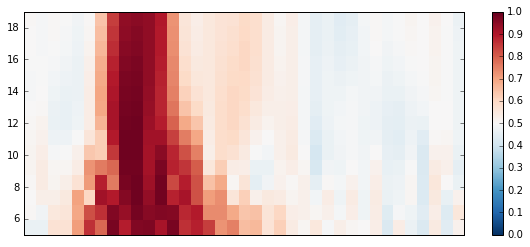

In [11]:
times = np.arange(np.shape(scores)[0]) / 128. - .150
freqs = np.arange(5., 20., 1.)
plt.matshow(1-scores, origin='normal',
            cmap='RdBu_r', vmin=0, vmax=1, aspect='auto',
            extent=[times[0], times[-1], freqs[0], freqs[-1]])
plt.colorbar()